In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.ensemble import GradientBoostingClassifier

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Archivo de entrenamiento
df_train = pd.read_csv('dataframe_train.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de entrenamiento
df_train['title_cleaned_preprocessed'] = df_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_train['description_preprocessed'] = df_train['description_nostopwords'].apply(preprocess_text)
df_train['full_content_preprocessed'] = df_train['full_content_nostopwords'].apply(preprocess_text)

# Archivo de prueba
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df_clean_train = pd.read_csv('./dataframe_train.csv')

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Aplicar preprocesamiento a las columnas relevantes
df_clean_train['title_cleaned_preprocessed'] = df_clean_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_clean_train['description_preprocessed'] = df_clean_train['description_nostopwords'].apply(preprocess_text)
df_clean_train['full_content_preprocessed'] = df_clean_train['full_content_nostopwords'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar el vectorizador en los datos preprocesados
features = vectorizer.fit_transform(df_clean_train['full_content_preprocessed'])


In [35]:
supporters = df_clean_train['supporters'].to_numpy()
from scipy.sparse import hstack

# Concatenar la matriz 'supporters' con 'features'
features_with_supporters = hstack((features, supporters.reshape(-1, 1)))


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, df_clean_train['victory_flag'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Gradient Boosting:", accuracy)

Precisión del modelo de Gradient Boosting: 0.8554216867469879


In [37]:
# Aplicar preprocesamiento y extracción de características a nuevos datos
new_text = preprocess_text("GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS")
new_features = vectorizer.transform([new_text])

# Realizar predicciones
predictions = gb_model.predict(new_features)

# Imprimir la predicción
print("La predicción es:", predictions)

La predicción es: [0]


In [38]:
# Cargar el archivo de prueba (suponiendo que tiene columnas similares a df_clean_train)
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento al texto en el archivo de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

# Combinar las columnas preprocesadas en un solo texto
df_test['combined_preprocessed'] = df_test['title_cleaned_preprocessed'] + ' ' + df_test['description_preprocessed'] + ' ' + df_test['full_content_preprocessed']

# Transformar el texto preprocesado en características utilizando el vectorizador
test_features = vectorizer.transform(df_test['combined_preprocessed'])

# Realizar predicciones en los datos de prueba utilizando el modelo entrenado
predictions = gb_model.predict(test_features)

# Añadir la columna 'victory_flag_prediction' al dataframe de prueba
df_test['victory_flag_prediction'] = predictions

# Filtrar los valores del dataframe cuando victory_flag_prediction es igual a 1
filtered_df = df_test[df_test['victory_flag_prediction'] == 1]

# Mostrar los valores filtrados
filtered_df



,title_cleaned_nostopwords,description_nostopwords,full_content_nostopwords,supporters,title_cleaned_preprocessed,description_preprocessed,full_content_preprocessed,combined_preprocessed,victory_flag_prediction
171,FUNDED IVF SEX COUPLES ENGLAND,"ENGLAND , SEX RELATIONSHIP NEED AROUND 6 FAILE...","ENGLAND , SEX RELATIONSHIP NEED AROUND 6 FAILE...",56116,funded ivf sex couples england,england sex relationship need around 6 failed ...,england sex relationship need around 6 failed ...,funded ivf sex couples england england sex rel...,1
207,GET ENDOMETRIOSIS RECOGNISED DISABILITY,DISABILITY . 11 YEAR AGO DIAGNOSED ENDOMETRIOS...,WANT RAISE AWARENESS ENDOMETRIOSIS WOULD LOVE ...,4212,get endometriosis recognised disability,disability 11 year ago diagnosed endometriosis...,want raise awareness endometriosis would love ...,get endometriosis recognised disability disabi...,1
272,PROVIDE SAFE HOUSING FOSTER HOMELESS STUDENTS ...,"SAFE STABLE HOUSING NEED LONG TERM . , 'VE CLO...",* PETITION UPDATE * THANKS MUCH SUPPORT CAMPAI...,125575,provide safe housing foster homeless students ...,safe stable housing need long term 've closed ...,petition update thanks much support campaign s...,provide safe housing foster homeless students ...,1
274,TELL ELECTRONIC ARTS OPPOSE INTERNET CENSORSHIP,"SOPA . N'T MESS INTERNET , EA . REGRET .",STOP ONLINE PIRACY ACT ( SOPA ) TOOL PROTECTS ...,136264,tell electronic arts oppose internet censorship,sopa n't mess internet ea regret,stop online piracy act sopa tool protects mono...,tell electronic arts oppose internet censorshi...,1
306,LOCAL SCIENTIST FACES RACIAL DISCRIMINATION FI...,NAME DR. VINIT SHARMA COMPUTATIONAL SCIENTIST ...,NAME DR. VINIT SHARMA COMPUTATIONAL SCIENTIST ...,11978,local scientist faces racial discrimination fi...,name dr. vinit sharma computational scientist ...,name dr. vinit sharma computational scientist ...,local scientist faces racial discrimination fi...,1
317,MAKE SEX RELATIONSHIPS EDUCATION ( SRE ) COMPU...,SEXTING WIDESPREAD ACCESS PORN - SCHOOL ENVIRO...,YOUNG PEOPLE TODAY SUBJECTED PRESSURES SCHOOLS...,46150,make sex relationships education sre compulsor...,sexting widespread access porn school environm...,young people today subjected pressures schools...,make sex relationships education sre compulsor...,1
398,JUSTICE MATHIS JOUANNEAU - JUSTICE MATHIS,MATHIS ABDUCTED FATHER CUSTODY WEEKEND SEPTEMB...,MATHIS ABDUCTED FATHER CUSTODY WEEKEND SEPTEMB...,135166,justice mathis jouanneau justice mathis,mathis abducted father custody weekend septemb...,mathis abducted father custody weekend septemb...,justice mathis jouanneau justice mathis mathis...,1


In [39]:
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 85.54%


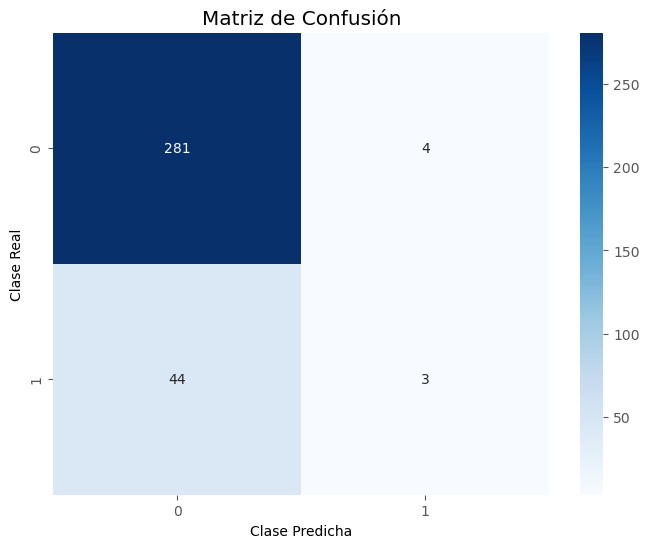

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       285
           1       0.43      0.06      0.11        47

    accuracy                           0.86       332
   macro avg       0.65      0.52      0.52       332
weighted avg       0.80      0.86      0.81       332



In [42]:
from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score del modelo: {:.2f}".format(f1))


Precisión del modelo: 85.54%
F1-Score del modelo: 0.11
